In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('VCB.csv')
df=df.reset_index()['Price']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 3s 92ms/step - loss: 0.0994 - val_loss: 0.2465
Epoch 2/100
9/9 [==============================] - 0s 37ms/step - loss: 0.0198 - val_loss: 0.0594
Epoch 3/100
9/9 [==============================] - 0s 38ms/step - loss: 0.0090 - val_loss: 0.0648
Epoch 4/100
9/9 [==============================] - 0s 37ms/step - loss: 0.0061 - val_loss: 0.0371
Epoch 5/100
9/9 [==============================] - 0s 38ms/step - loss: 0.0046 - val_loss: 0.0411
Epoch 6/100
9/9 [==============================] - 0s 37ms/step - loss: 0.0040 - val_loss: 0.0314
Epoch 7/100
9/9 [==============================] - 0s 37ms/step - loss: 0.0037 - val_loss: 0.0274
Epoch 8/100
9/9 [==============================] - 0s 37ms/step - loss: 0.0034 - val_loss: 0.0287
Epoch 9/100
9/9 [==============================] - 0s 36ms/step - loss: 0.0030 - val_loss: 0.0227
Epoch 10/100
9/9 [==============================] - 0s 37ms/step - loss: 0.0028 - val_loss: 0.0255
Epoch 11/100
9/9 [=

9/9 [==============================] - 0s 34ms/step - loss: 5.7423e-04 - val_loss: 0.0028
Epoch 83/100
9/9 [==============================] - 0s 35ms/step - loss: 5.5868e-04 - val_loss: 0.0041
Epoch 84/100
9/9 [==============================] - 0s 39ms/step - loss: 5.8960e-04 - val_loss: 0.0055
Epoch 85/100
9/9 [==============================] - 0s 39ms/step - loss: 7.7368e-04 - val_loss: 0.0030
Epoch 86/100
9/9 [==============================] - 0s 34ms/step - loss: 6.2939e-04 - val_loss: 0.0023
Epoch 87/100
9/9 [==============================] - 0s 35ms/step - loss: 5.4683e-04 - val_loss: 0.0032
Epoch 88/100
9/9 [==============================] - 0s 36ms/step - loss: 5.4312e-04 - val_loss: 0.0019
Epoch 89/100
9/9 [==============================] - 0s 38ms/step - loss: 5.4658e-04 - val_loss: 0.0036
Epoch 90/100
9/9 [==============================] - 0s 38ms/step - loss: 5.5577e-04 - val_loss: 0.0031
Epoch 91/100
9/9 [==============================] - 0s 35ms/step - loss: 5.3878e-04 - 

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

5/5 [==============================] - 0s 8ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [12]:
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1)

In [13]:
# 12. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val1)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test1)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val1 - y_pred_val) / y_val1)) * 100
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val1))
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 10587.89974667181
Testing RMSE: 6030.633502963212
Validation MAPE: 10.854826931645015
Testing MAPE: 5.788063254523588
Validation MAE: 8733.698372353434
Testing MAE: 4618.593562615313


In [14]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[len(val_data)-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=99
i=0
while(i<30):

    if(len(temp_input)>99):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.69745195 0.70794495 0.70444728 0.70094962 0.70444728 0.72018678
 0.7324286  0.72018678 0.76565642 0.76915409 0.79014008 0.79014008
 0.84085623 0.84785156 0.80937724 0.80413074 0.82161907 0.84785156
 0.88457704 0.89507004 0.94753502 0.94753502 0.89332121 0.92829786
 0.87933055 0.90556304 0.94753502 1.         0.93004669 0.96852101
 0.94753502 0.97376751 0.95627918 0.93879086 0.94753502 0.93704202
 0.94753502 0.96152568 0.96852101 0.94753502 0.95278152 0.95627918
 0.94403736 0.95627918 0.94753502 0.95103269 0.91080953 0.91255837
 0.92829786 0.93354436 0.94753502 0.93179553 0.92130253 0.91255837
 0.9195537  0.91255837 0.87758171 0.80937724 0.8338609  0.87758171
 0.90731187 0.87758171 0.91255837 0.92654903 0.93529319 0.94228852
 0.9195537  0.94403736 0.93004669 0.93179553 0.91605603 0.89507004
 0.87758171 0.86359105 0.86533989 0.86359105 0.86708872 0.86708872
 0.86009339 0.86883755 0.86533989 0.85134922 0.85834456 0.86533989
 0.88457704 0.89507004 0.9038142  0.86883755 0.891

9 day output [[0.6972228]]
10 day input [0.79014008 0.79014008 0.84085623 0.84785156 0.80937724 0.80413074
 0.82161907 0.84785156 0.88457704 0.89507004 0.94753502 0.94753502
 0.89332121 0.92829786 0.87933055 0.90556304 0.94753502 1.
 0.93004669 0.96852101 0.94753502 0.97376751 0.95627918 0.93879086
 0.94753502 0.93704202 0.94753502 0.96152568 0.96852101 0.94753502
 0.95278152 0.95627918 0.94403736 0.95627918 0.94753502 0.95103269
 0.91080953 0.91255837 0.92829786 0.93354436 0.94753502 0.93179553
 0.92130253 0.91255837 0.9195537  0.91255837 0.87758171 0.80937724
 0.8338609  0.87758171 0.90731187 0.87758171 0.91255837 0.92654903
 0.93529319 0.94228852 0.9195537  0.94403736 0.93004669 0.93179553
 0.91605603 0.89507004 0.87758171 0.86359105 0.86533989 0.86359105
 0.86708872 0.86708872 0.86009339 0.86883755 0.86533989 0.85134922
 0.85834456 0.86533989 0.88457704 0.89507004 0.9038142  0.86883755
 0.89157238 0.94753502 0.93529319 0.93004669 0.91255837 0.94403736
 0.9248002  0.94053969 0.94403

17 day output [[0.61907375]]
18 day input [0.88457704 0.89507004 0.94753502 0.94753502 0.89332121 0.92829786
 0.87933055 0.90556304 0.94753502 1.         0.93004669 0.96852101
 0.94753502 0.97376751 0.95627918 0.93879086 0.94753502 0.93704202
 0.94753502 0.96152568 0.96852101 0.94753502 0.95278152 0.95627918
 0.94403736 0.95627918 0.94753502 0.95103269 0.91080953 0.91255837
 0.92829786 0.93354436 0.94753502 0.93179553 0.92130253 0.91255837
 0.9195537  0.91255837 0.87758171 0.80937724 0.8338609  0.87758171
 0.90731187 0.87758171 0.91255837 0.92654903 0.93529319 0.94228852
 0.9195537  0.94403736 0.93004669 0.93179553 0.91605603 0.89507004
 0.87758171 0.86359105 0.86533989 0.86359105 0.86708872 0.86708872
 0.86009339 0.86883755 0.86533989 0.85134922 0.85834456 0.86533989
 0.88457704 0.89507004 0.9038142  0.86883755 0.89157238 0.94753502
 0.93529319 0.93004669 0.91255837 0.94403736 0.9248002  0.94053969
 0.94403736 0.98251167 0.96852101 0.88398552 0.8690052  0.82840174
 0.80954826 0.789801

25 day output [[0.5543617]]
26 day input [0.94753502 1.         0.93004669 0.96852101 0.94753502 0.97376751
 0.95627918 0.93879086 0.94753502 0.93704202 0.94753502 0.96152568
 0.96852101 0.94753502 0.95278152 0.95627918 0.94403736 0.95627918
 0.94753502 0.95103269 0.91080953 0.91255837 0.92829786 0.93354436
 0.94753502 0.93179553 0.92130253 0.91255837 0.9195537  0.91255837
 0.87758171 0.80937724 0.8338609  0.87758171 0.90731187 0.87758171
 0.91255837 0.92654903 0.93529319 0.94228852 0.9195537  0.94403736
 0.93004669 0.93179553 0.91605603 0.89507004 0.87758171 0.86359105
 0.86533989 0.86359105 0.86708872 0.86708872 0.86009339 0.86883755
 0.86533989 0.85134922 0.85834456 0.86533989 0.88457704 0.89507004
 0.9038142  0.86883755 0.89157238 0.94753502 0.93529319 0.93004669
 0.91255837 0.94403736 0.9248002  0.94053969 0.94403736 0.98251167
 0.96852101 0.88398552 0.8690052  0.82840174 0.80954826 0.78980148
 0.77156776 0.75445712 0.72789598 0.71494764 0.69722283 0.68362331
 0.67811489 0.6676470

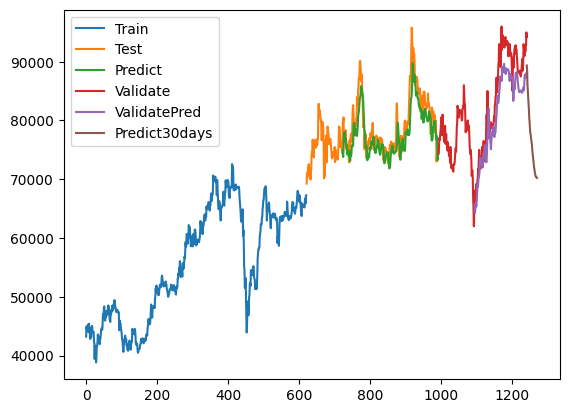

In [15]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()